In [148]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ( accuracy_score, precision_score, recall_score,  ConfusionMatrixDisplay)


Utilizamos  **Adult Census Income Dataset** para predecir si una persona gana **más de 50K** al año.  

In [149]:

dataset = pd.read_csv('datos/adult.csv')
dataset.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Vamos a convertir el target en more/less (solo por gedes) y despues crear otro que se llamae income_bin y contenga en 0 1 para usar skit learn

In [150]:

dataset['income'] = dataset['income'].str.strip()


dataset['income'] = dataset['income'].map({
    '<=50K': 'less',   # gana menos
    '>50K': 'more'     # gana más
})


dataset['income_bin'] = dataset['income'].map({'less': 0, 'more': 1})

dataset[['income', 'income_bin']].head()


,income,income_bin
0,less,0
1,less,0
2,less,0
3,less,0
4,less,0


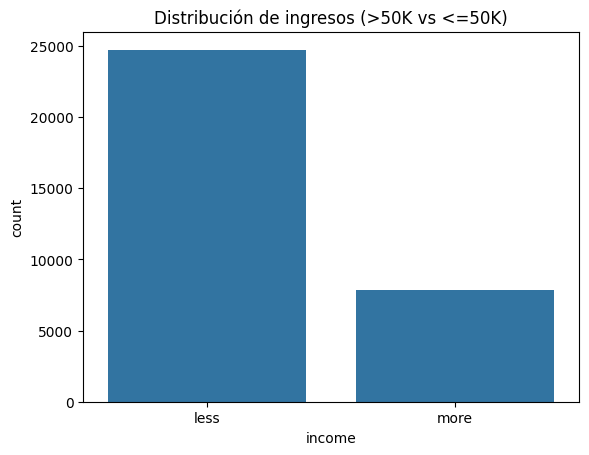

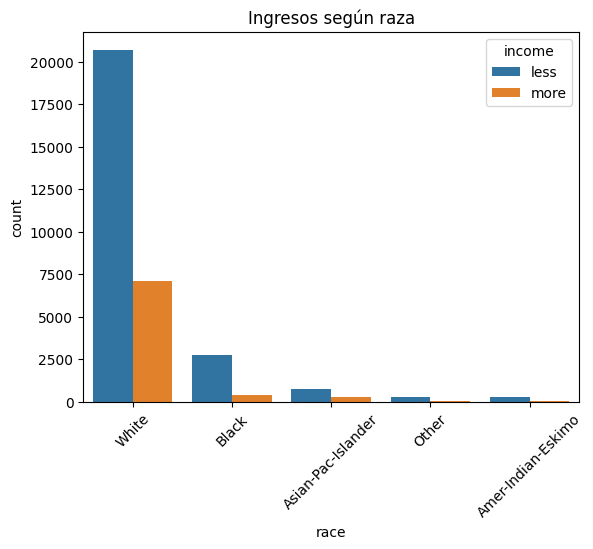

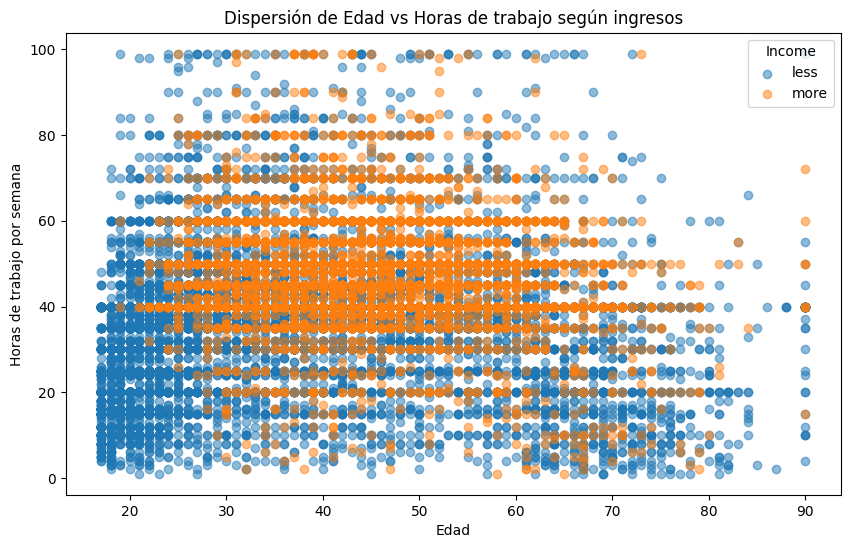

In [151]:
sns.countplot(x="income", data=dataset)
plt.title("Distribución de ingresos (>50K vs <=50K)")
plt.show()

sns.countplot(x="race", hue="income", data=dataset)
plt.title("Ingresos según raza")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
for label in dataset["income"].unique():
    subset = dataset[dataset["income"] == label]
    plt.scatter(
        subset["age"],
        subset["hours.per.week"],   #var en y
        alpha=0.5,
        label=label
    )

plt.xlabel("Edad")
plt.ylabel("Horas de trabajo por semana")
plt.title("Dispersión de Edad vs Horas de trabajo según ingresos")
plt.legend(title="Income")
plt.show()




Seleccionamos las features que vamos a utilizar para los dos primeros

In [152]:

num_features = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]

X = dataset[num_features]
y = dataset["income_bin"]
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

   age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week
0   90   77053              9             0          4356              40
1   82  132870              9             0          4356              18
2   66  186061             10             0          4356              40
3   54  140359              4             0          3900              40
4   41  264663             10             0          3900              40


Regresión Logística
Accuracy: 0.8134916572832429
Precision: 0.701062215477997
Recall: 0.39285714285714285


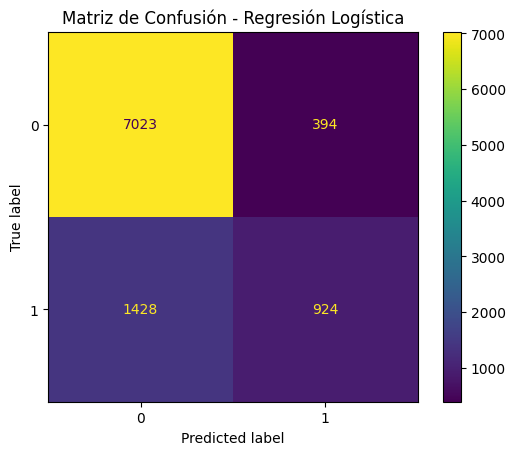


Árbol de Decisión
Accuracy: 0.7670181185382332
Precision: 0.515993265993266
Recall: 0.5212585034013606


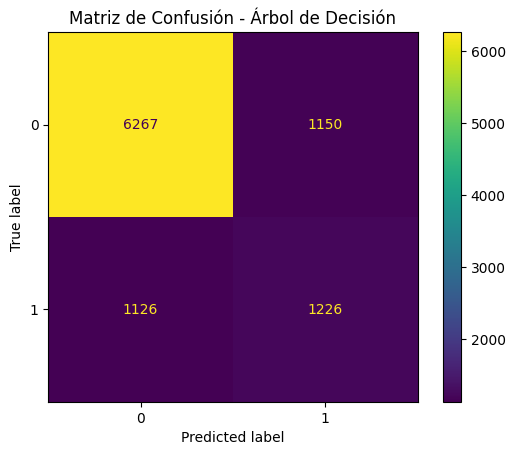

In [153]:
#No sabiamos lo que era recall: 
# De todos los positivos reales, ¿cuántos detectó el modelo?
# Ej: de todas las personas que realmente ganan más de 50K, ¿cuántas logró identificar el modelo?

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr)) 

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nÁrbol de Decisión")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree)) 

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


Nos parece que los resultados son bajos ya que estamos usando muy pocas columnas. 

Ahora tenemos que pasar los datos categoricos a numericos con one hot encoding los que tenemos que pasar son varios
Tambien hay que fijarse si hay id o algo que no nos sirva del dataset y "eliminarlo" con one hot encoding
Luego volvemos a repetir el proceso 

no nos sirva que nuestro modelo tenga  fnlwgt

In [154]:
dataset = dataset.drop(columns=["fnlwgt"])
cat_features = ["workclass", "marital.status", "occupation", "relationship", "race", "sex", "native.country","education",]

dataset = pd.get_dummies(dataset, columns=cat_features, dtype=int)

dataset.head()



,age,education.num,capital.gain,capital.loss,hours.per.week,income,income_bin,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,90,9,0,4356,40,less,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,82,9,0,4356,18,less,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,66,10,0,4356,40,less,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,54,4,0,3900,40,less,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41,10,0,3900,40,less,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [155]:
leak_cols = ["income", "income_bin"] + [c for c in dataset.columns if c.startswith("income_")]
#ahi no dejamos que ninguna columna que mepieze con income "sea parte"
X = dataset.drop(columns=leak_cols) 
y = dataset["income_bin"]

print(X.columns.tolist())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("cols que quedaron en X con 'income':", [c for c in X.columns if "income" in c])
print("shapes ->", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'marital.status_Divorced', 'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse', 'marital.status_Married-spouse-absent', 'marital.status_Never-married', 'marital.status_Separated', 'marital.status_Widowed', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_O

Regresión Logística
Accuracy: 0.8519807554509161
Precision: 0.7304170905391658
Recall: 0.6105442176870748


/Users/brigu/Desktop/tp-ia/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


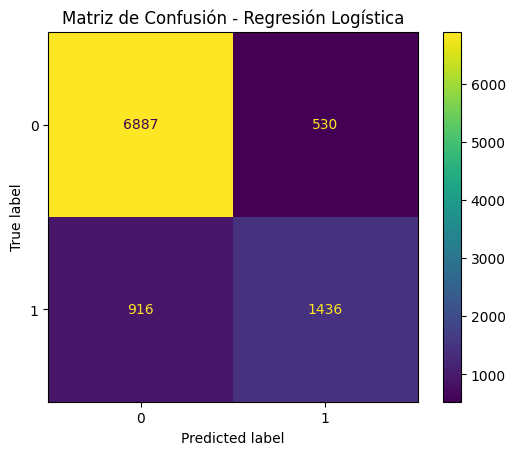


Árbol de Decisión
Accuracy: 0.8124680110553792
Precision: 0.6136363636363636
Recall: 0.5969387755102041


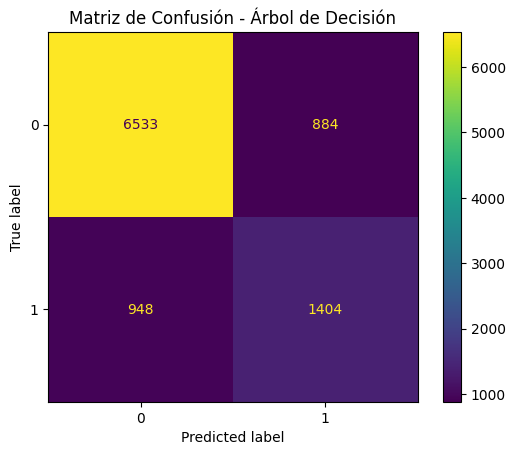

In [156]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr)) 

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nÁrbol de Decisión")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree)) 

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0


Mejor Árbol de Decisión
Best params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV score: 0.8542907138919963
Accuracy: 0.8464530658204524
Precision: 0.6889973380656611
Recall: 0.6602891156462585


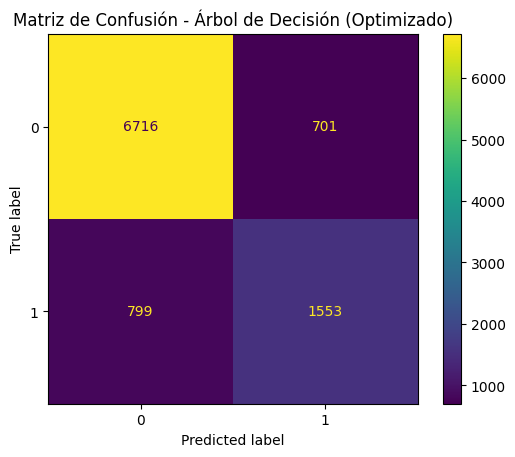

In [157]:
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nMejor Árbol de Decisión")
print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title("Matriz de Confusión - Árbol de Decisión (Optimizado)")
plt.show()

Al principio la acurracy nos dio 1.0 algo muy inusual. Nos finamos cuantos datos habia con print(len(dataset)) y hay aprox 3600. Asi que yo supongo que es un error nuestor :(
    Lo que pasaba es que habia varios incomes debido a one hot encoding (income_less / income_more) que estan completamente relacionadas con income_bin que es lo que queremos predecir.

In [158]:
print("Dataset completo:", dataset.shape)
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


Dataset completo: (32561, 109)
X_train: (22792, 107) y_train: (22792,)
X_test: (9769, 107) y_test: (9769,)
